# **Can machine learning be used to differentiate between album rock and dance pop?**

Using Linear Regression, MLPClassifier, K-means and Agglomerative Clustering

Data source: https://www.kaggle.com/code/danielsheen/spotify-song-genre-classification/notebook

In [108]:
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from scipy.stats import shapiro
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import scipy.cluster.hierarchy as sch
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, Normalizer, scale, MinMaxScaler
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.metrics.cluster import rand_score

In [109]:
df_2000 = pd.read_csv("Spotify-2000.csv")
df_top10s = pd.read_csv("top10sdobry.csv", engine='python') 

# delete not nessesary columns
df_2000.drop(columns = ['Index', 'Title', 'Artist', 'Year'], inplace = True)
df_top10s.drop(columns = ['id', 'title', 'artist', 'year'], inplace = True)

In [110]:
# rename columns so they match
df_top10s.columns = df_2000.columns

# unite csv
data = df_2000.append(df_top10s, ignore_index = True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596 entries, 0 to 2595
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Top Genre               2538 non-null   object 
 1   Beats Per Minute (BPM)  2538 non-null   float64
 2   Energy                  2538 non-null   float64
 3   Danceability            2538 non-null   float64
 4   Loudness (dB)           2538 non-null   float64
 5   Liveness                2538 non-null   float64
 6   Valence                 2538 non-null   float64
 7   Length (Duration)       2538 non-null   float64
 8   Acousticness            2538 non-null   float64
 9   Speechiness             2538 non-null   float64
 10  Popularity              2538 non-null   float64
dtypes: float64(10), object(1)
memory usage: 223.2+ KB


In [111]:
data = data.dropna()
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2507 entries, 0 to 2595
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Top Genre               2507 non-null   object 
 1   Beats Per Minute (BPM)  2507 non-null   float64
 2   Energy                  2507 non-null   float64
 3   Danceability            2507 non-null   float64
 4   Loudness (dB)           2507 non-null   float64
 5   Liveness                2507 non-null   float64
 6   Valence                 2507 non-null   float64
 7   Length (Duration)       2507 non-null   float64
 8   Acousticness            2507 non-null   float64
 9   Speechiness             2507 non-null   float64
 10  Popularity              2507 non-null   float64
dtypes: float64(10), object(1)
memory usage: 235.0+ KB


In [112]:
# lets see top 10
data.head(10)

,Top Genre,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,adult standards,157.0,30.0,53.0,-14.0,11.0,68.0,201.0,94.0,3.0,71.0
1,album rock,135.0,79.0,50.0,-11.0,17.0,81.0,207.0,17.0,7.0,39.0
2,alternative hip hop,168.0,69.0,66.0,-9.0,7.0,52.0,341.0,2.0,17.0,69.0
3,alternative metal,173.0,96.0,43.0,-4.0,3.0,37.0,269.0,0.0,4.0,76.0
4,classic rock,106.0,82.0,58.0,-5.0,10.0,87.0,256.0,1.0,3.0,59.0
5,alternative pop rock,99.0,46.0,54.0,-9.0,14.0,14.0,247.0,0.0,2.0,45.0
6,pop,102.0,71.0,71.0,-6.0,13.0,54.0,257.0,6.0,3.0,74.0
7,modern rock,137.0,96.0,37.0,-5.0,12.0,21.0,366.0,0.0,14.0,69.0
8,modern rock,148.0,92.0,36.0,-4.0,10.0,23.0,223.0,0.0,8.0,77.0
9,detroit hip hop,112.0,67.0,91.0,-3.0,24.0,66.0,290.0,0.0,7.0,82.0


In [113]:
data.describe()

,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
count,2507.000000,2507.000000,2507.000000,2507.000000,2507.000000,2507.000000,2507.000000,2507.000000,2507.000000,2507.000000
mean,119.870363,62.302752,55.834464,-8.198644,18.453530,49.975269,252.240527,25.379737,5.745513,60.985640
std,27.331351,21.480677,15.627910,3.753640,15.523112,24.350169,75.100911,27.930812,5.366594,14.654269
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,93.000000,0.000000,0.000000,0.000000
25%,100.000000,46.000000,45.000000,-10.000000,9.000000,30.000000,208.000000,3.000000,3.000000,52.000000
50%,120.000000,65.000000,56.000000,-7.000000,12.000000,49.000000,237.000000,13.000000,4.000000,63.000000
75%,134.000000,80.000000,67.000000,-5.000000,22.500000,69.000000,277.500000,43.000000,6.000000,72.000000
max,206.000000,100.000000,97.000000,-2.000000,99.000000,99.000000,966.000000,99.000000,55.000000,100.000000


dance pop                397
album rock               397
adult standards          113
pop                      102
dutch pop                 87
                        ... 
alternative country        1
celtic punk                1
classic canadian rock      1
happy hardcore             1
alternative r&b            1
Name: Top Genre, Length: 164, dtype: int64


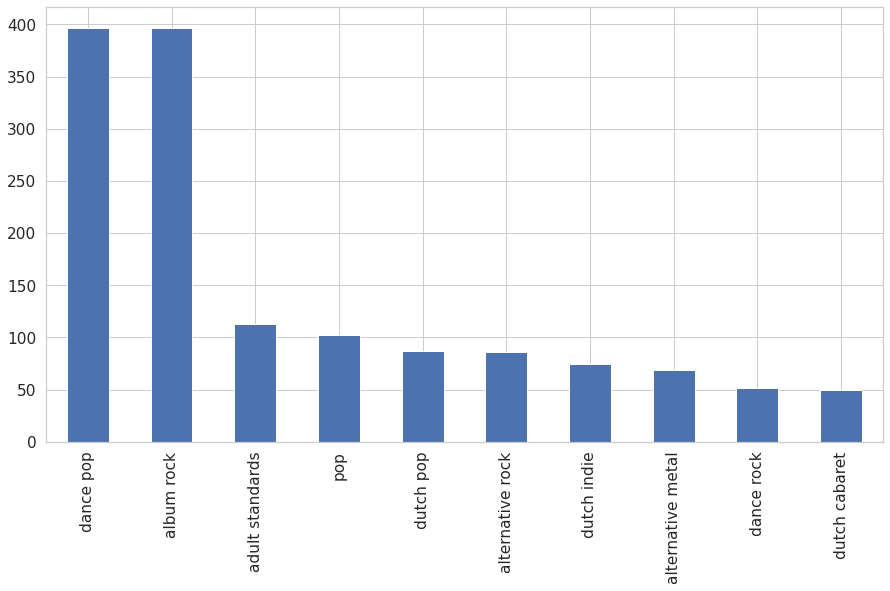

In [114]:
genres = data["Top Genre"].value_counts()
print(genres)
genres.nlargest(10).plot.bar(figsize = (15,8))

In [115]:
# create df only for dance pop and album roc
popnrock = data[(data["Top Genre"]=="dance pop") | (data["Top Genre"]=='album rock')].copy()

popnrock.head(10)

,Top Genre,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
1,album rock,135.0,79.0,50.0,-11.0,17.0,81.0,207.0,17.0,7.0,39.0
13,album rock,117.0,93.0,38.0,-2.0,81.0,40.0,639.0,18.0,10.0,26.0
19,dance pop,74.0,65.0,62.0,-7.0,10.0,56.0,288.0,57.0,18.0,74.0
31,album rock,181.0,59.0,56.0,-9.0,20.0,68.0,306.0,32.0,3.0,57.0
45,dance pop,168.0,57.0,38.0,-5.0,35.0,26.0,278.0,4.0,3.0,56.0
54,dance pop,149.0,30.0,33.0,-7.0,11.0,14.0,243.0,78.0,3.0,67.0
59,album rock,124.0,59.0,47.0,-8.0,28.0,18.0,236.0,42.0,3.0,38.0
66,dance pop,92.0,69.0,76.0,-5.0,57.0,73.0,297.0,3.0,5.0,56.0
67,album rock,105.0,73.0,68.0,-8.0,14.0,94.0,281.0,11.0,2.0,59.0
88,album rock,115.0,67.0,72.0,-12.0,5.0,65.0,231.0,6.0,4.0,43.0


Czas sprawdzić korelację cech utworów. Ten krok pozwala m.in na odrzucenie niepotrzebnych kategorii i zwrócenie uwagi na właściwosci danych pozwalających na jakdokładniejsze rozróżnienie. 

In [116]:
dance_pop = data[data["Top Genre"]=='dance pop'];
album_rock = data[data["Top Genre"]=='album rock'];

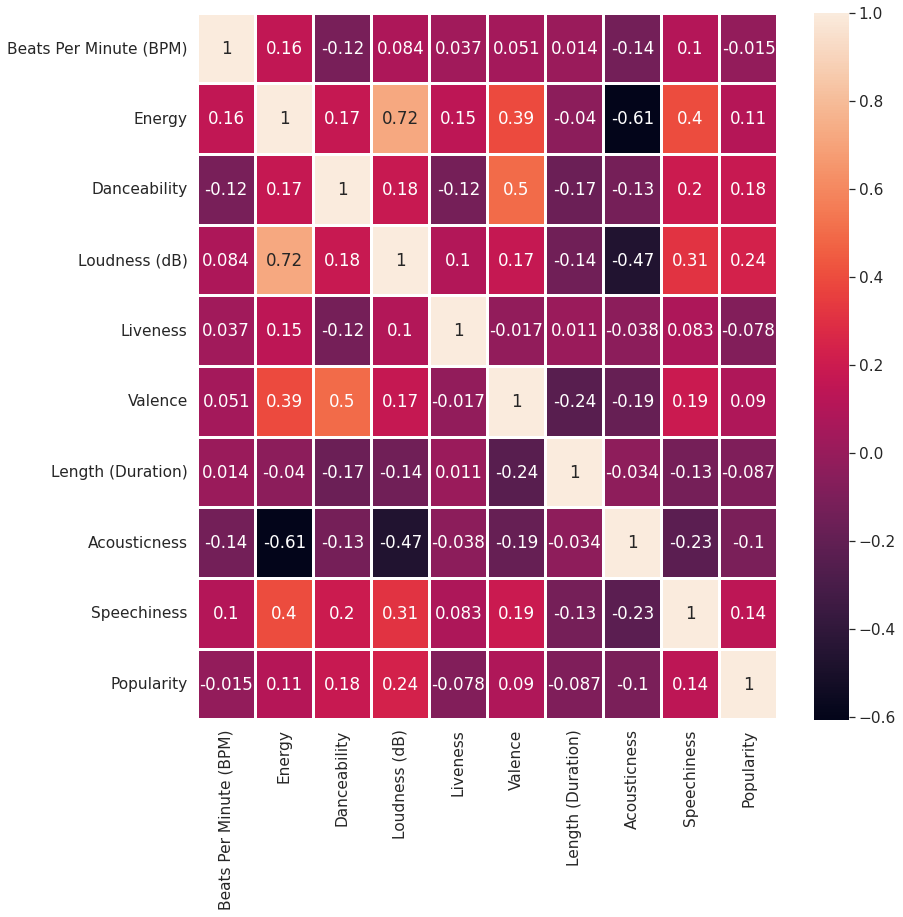

In [117]:
# check correlation
corr = data.corr(method='spearman')
plt.subplots(figsize=(13,13))
sns.heatmap(corr, annot=corr, linewidths=2)
plt.show()

Strong correlation between loudness and energy, and between acusticness and loudness

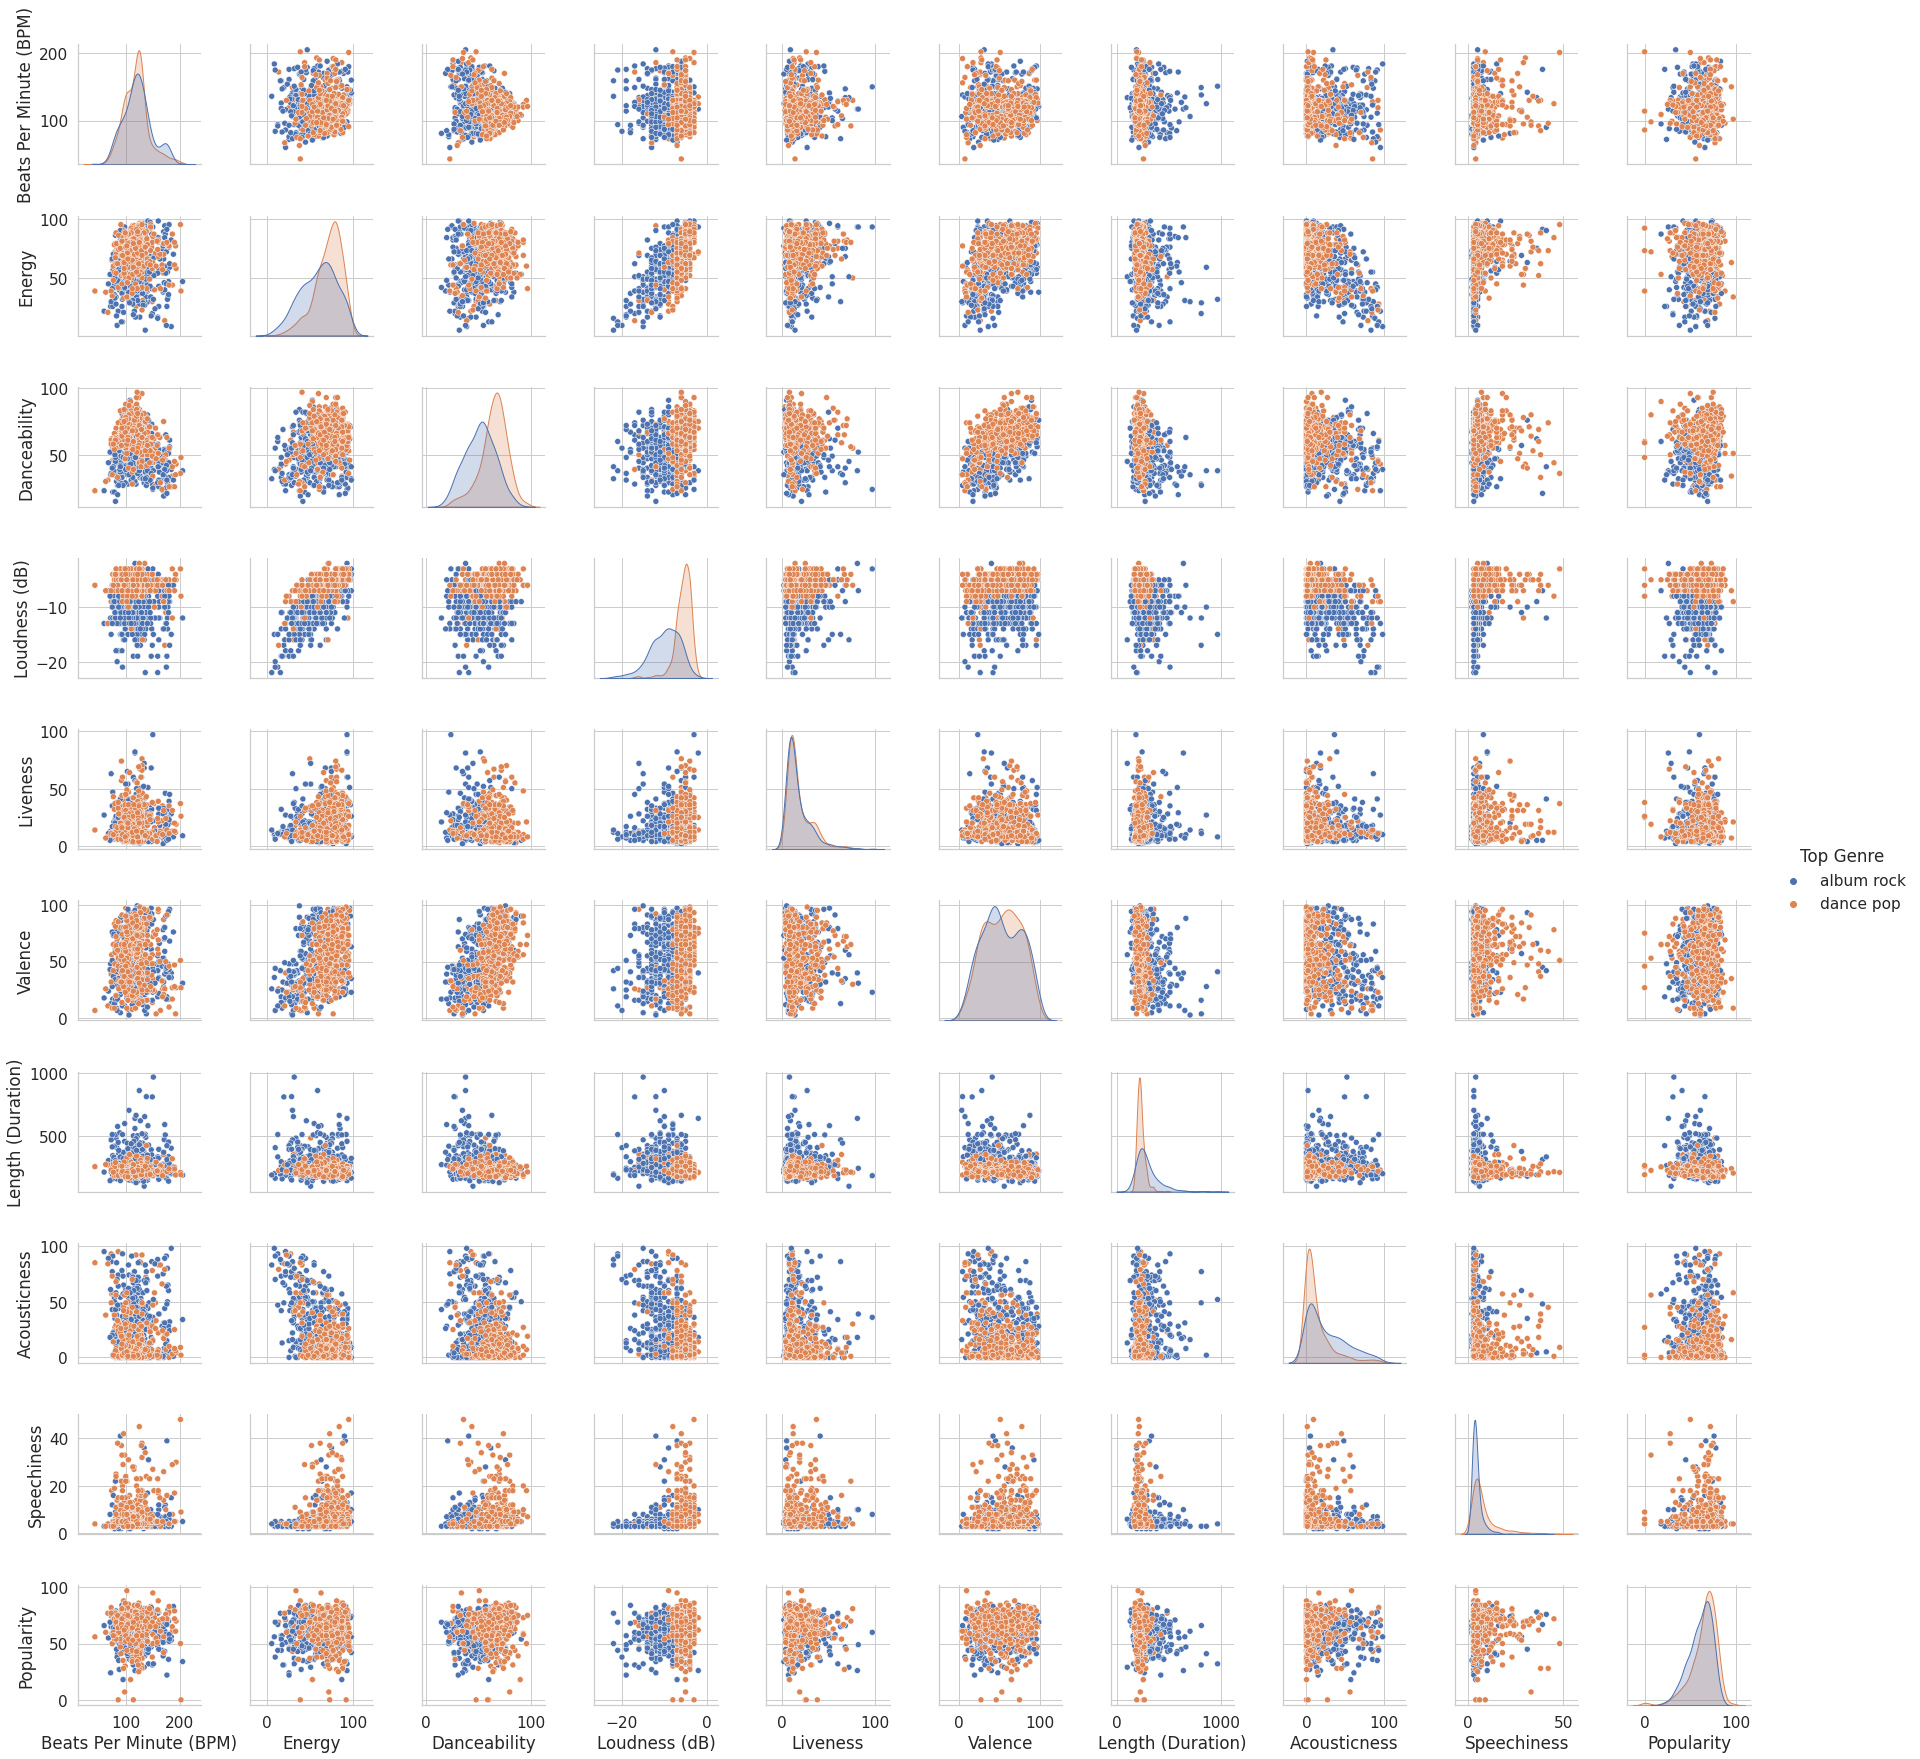

In [118]:
sns.pairplot(popnrock, hue="Top Genre")

In [119]:
# if we want we can get rid of energy/loudness or acusticness

#popnrock.drop(columns = ['Energy'], inplace = True)
#dance_pop.drop(columns = ['Energy'], inplace = True)
#album_rock.drop(columns = ['Energy'], inplace = True)

In [120]:
album_rock.head(10)

,Top Genre,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
1,album rock,135.0,79.0,50.0,-11.0,17.0,81.0,207.0,17.0,7.0,39.0
13,album rock,117.0,93.0,38.0,-2.0,81.0,40.0,639.0,18.0,10.0,26.0
31,album rock,181.0,59.0,56.0,-9.0,20.0,68.0,306.0,32.0,3.0,57.0
59,album rock,124.0,59.0,47.0,-8.0,28.0,18.0,236.0,42.0,3.0,38.0
67,album rock,105.0,73.0,68.0,-8.0,14.0,94.0,281.0,11.0,2.0,59.0
88,album rock,115.0,67.0,72.0,-12.0,5.0,65.0,231.0,6.0,4.0,43.0
123,album rock,79.0,36.0,53.0,-7.0,9.0,40.0,238.0,53.0,2.0,70.0
137,album rock,91.0,63.0,67.0,-12.0,10.0,86.0,245.0,1.0,5.0,54.0
141,album rock,139.0,77.0,55.0,-9.0,13.0,42.0,253.0,0.0,3.0,63.0
146,album rock,141.0,30.0,71.0,-12.0,10.0,48.0,203.0,44.0,3.0,44.0


In [121]:
# lets code our categories
code = pd.get_dummies(popnrock.iloc[:,0].values)
print(code)

     album rock  dance pop
0             1          0
1             1          0
2             0          1
3             1          0
4             0          1
..          ...        ...
789           0          1
790           0          1
791           0          1
792           0          1
793           0          1

[794 rows x 2 columns]


# **Supervised**


In [122]:
# lets split our data 10 to 90
train_set, test_set = train_test_split(popnrock, test_size = 0.1, random_state = 42) 

# training set
X_train = train_set.values[:,1:7] 
y_train = train_set.values[:,0]

# test set
X_test = test_set.values[:,1:7]
y_test = test_set.values[:,0]

In [123]:
# Standarization /optional
standard_scaler = StandardScaler().fit(X_train)

X_train_ST = standard_scaler.transform(X_train)
X_test_ST = standard_scaler.transform(X_test)

In [124]:
# Scaling /optinal
scaler = MinMaxScaler(feature_range=[0,1])
X_train_SC = scaler.fit_transform(X_train)
X_test_SC = scaler.fit_transform(X_test)

data_without_labels=popnrock.drop(columns=["Top Genre"])
df_scaled = scaler.fit_transform(data_without_labels)

In [125]:
parametersGS = {'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
'dual': [True, False]}
searchGS = GridSearchCV(LogisticRegression(), parametersGS, cv = 5)


searchGS.fit(X_train, y_train)

print(searchGS.best_params_) # best parameters 
print(searchGS.best_score_) # best score

{'dual': False, 'penalty': 'l2'}
0.8725105880035458


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

In [126]:
# Logistic Regression

log_reg_acc = []
logreg = LogisticRegression(penalty = 'l2', dual = False)
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

accuracy_tree = metrics.accuracy_score(y_test, y_pred) *100
print(f'Accuracy: {accuracy_tree:.2f}%')

precision_tree = metrics.precision_score(y_test, y_pred, average ='macro') *100
print(f'Precision: {precision_tree:.2f}%')

recall_tree = metrics.recall_score(y_test, y_pred, average ='macro') *100
print(f'Recall: {recall_tree:.2f}%')

F1_tree = metrics.f1_score(y_test, y_pred, average ='macro') *100
print(f'F1: {F1_tree:.2f}%')

print(classification_report(y_test, y_pred))
log_reg_acc.append(accuracy_tree)

Accuracy: 85.00%
Precision: 84.53%
Recall: 84.53%
F1: 84.53%
              precision    recall  f1-score   support

  album rock       0.82      0.82      0.82        33
   dance pop       0.87      0.87      0.87        47

    accuracy                           0.85        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.85      0.85      0.85        80



In [127]:
#Logistic Regression, standarized
logreg_ST = LogisticRegression(penalty = 'l2', dual = False)
logreg_ST.fit(X_train_ST,y_train)

y_pred_ST = logreg_ST.predict(X_test_ST)

accuracy_tree = metrics.accuracy_score(y_test, y_pred_ST) *100
print(f'Accuracy: {accuracy_tree:.2f}%')

precision_tree = metrics.precision_score(y_test, y_pred_ST, average ='macro') *100
print(f'Precision: {precision_tree:.2f}%')

recall_tree = metrics.recall_score(y_test, y_pred_ST, average ='macro') *100
print(f'Recall: {recall_tree:.2f}%')

F1_tree = metrics.f1_score(y_test, y_pred_ST, average ='macro') *100
print(f'F1: {F1_tree:.2f}%')

print(classification_report(y_test, y_pred_ST))
log_reg_acc.append(accuracy_tree)

Accuracy: 85.00%
Precision: 84.53%
Recall: 84.53%
F1: 84.53%
              precision    recall  f1-score   support

  album rock       0.82      0.82      0.82        33
   dance pop       0.87      0.87      0.87        47

    accuracy                           0.85        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.85      0.85      0.85        80



In [128]:
precisions = []
#Logistic Regression, scaled
logreg_SC = LogisticRegression(penalty = 'l2', dual = False)
logreg_SC.fit(X_train_SC,y_train)

y_pred_SC = logreg_SC.predict(X_test_SC)

accuracy_tree = metrics.accuracy_score(y_test, y_pred_SC) *100
print(f'Accuracy: {accuracy_tree:.2f}%')

precision_tree = metrics.precision_score(y_test, y_pred_SC, average ='macro') *100
print(f'Precision: {precision_tree:.2f}%')

recall_tree = metrics.recall_score(y_test, y_pred_SC, average ='macro') *100
print(f'Recall: {recall_tree:.2f}%')

F1_tree = metrics.f1_score(y_test, y_pred_SC, average ='macro') *100
print(f'F1: {F1_tree:.2f}%')

print(classification_report(y_test, y_pred_SC))

log_reg_acc.append(accuracy_tree)
precisions.append(max(log_reg_acc))

Accuracy: 80.00%
Precision: 79.51%
Recall: 80.27%
F1: 79.68%
              precision    recall  f1-score   support

  album rock       0.73      0.82      0.77        33
   dance pop       0.86      0.79      0.82        47

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.81      0.80      0.80        80



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

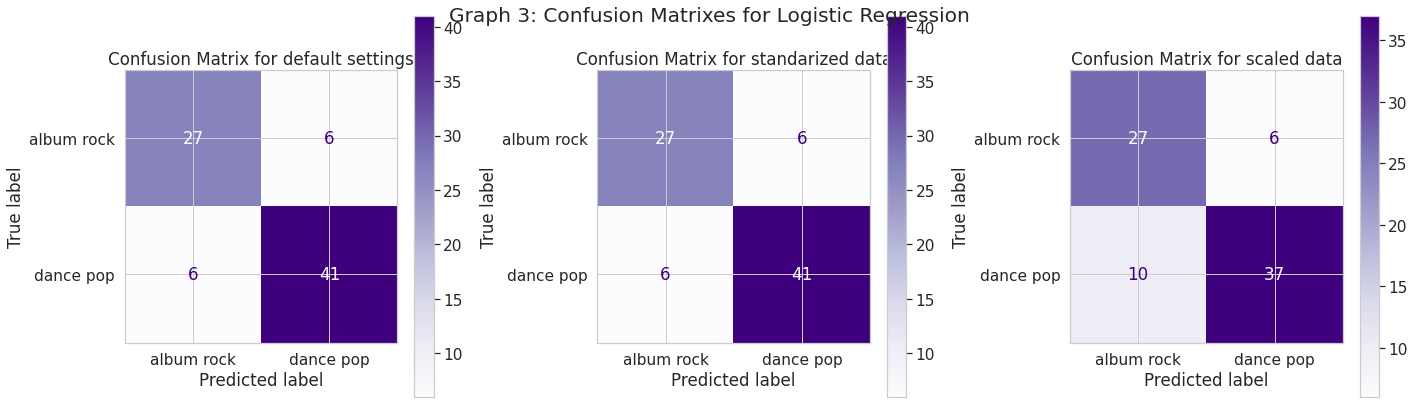

In [129]:
classifiers = [logreg, logreg_ST, logreg_SC]
confusion_plot_titles = ['Confusion Matrix for default settings', 
                         'Confusion Matrix for standarized data', 
                         'Confusion Matrix for scaled data']

author_matrix = ["Album Rock, Dance Pop"]
X_tests = [X_test, X_test_ST, X_test_SC]

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20,6))
n = 0;
for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, X_tests[n], y_test, ax=ax, cmap = "Purples");
    ax.title.set_text(confusion_plot_titles[n])
    n += 1;

plt.tight_layout()  
plt.suptitle('Graph 3: Confusion Matrixes for Logistic Regression')
#plt.rc('font', size = 11)  
plt.show()

In [130]:
parametersGS = {'solver': ['lbfgs', 'sgd', 'adam'], 
'shuffle': [True, False]}
searchGS = GridSearchCV(MLPClassifier(), parametersGS, cv = 5)

searchGS.fit(X_train, y_train)

print(searchGS.best_params_) 
print(searchGS.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

{'shuffle': True, 'solver': 'sgd'}
0.8739190387077711


In [131]:
mlpc_acc = []
MLPC = MLPClassifier(shuffle = False, solver = 'adam')
MLPC = MLPC.fit(X_train, y_train)
y_mlpc = MLPC.predict(X_test)

accuracy_tree = metrics.accuracy_score(y_test, y_mlpc) *100
print(f'Accuracy: {accuracy_tree:.2f}%')

precision_tree = metrics.precision_score(y_test, y_mlpc, average ='macro') *100
print(f'Precision: {precision_tree:.2f}%')

recall_tree = metrics.recall_score(y_test, y_mlpc, average ='macro') *100
print(f'Recall: {recall_tree:.2f}%')

F1_tree = metrics.f1_score(y_test, y_mlpc, average ='macro') *100
print(f'F1: {F1_tree:.2f}%')

print(classification_report(y_test, y_mlpc))
mlpc_acc.append(accuracy_tree)

Accuracy: 85.00%
Precision: 84.79%
Recall: 84.07%
F1: 84.38%
              precision    recall  f1-score   support

  album rock       0.84      0.79      0.81        33
   dance pop       0.86      0.89      0.88        47

    accuracy                           0.85        80
   macro avg       0.85      0.84      0.84        80
weighted avg       0.85      0.85      0.85        80



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [132]:
MLPC_ST = MLPClassifier(shuffle = True, solver = 'adam')
MLPC_ST = MLPC_ST.fit(X_train_ST, y_train)
y_mlpc = MLPC_ST.predict(X_test_ST)

accuracy_tree = metrics.accuracy_score(y_test, y_mlpc) *100
print(f'Accuracy: {accuracy_tree:.2f}%')

precision_tree = metrics.precision_score(y_test, y_mlpc, average ='macro') *100
print(f'Precision: {precision_tree:.2f}%')

recall_tree = metrics.recall_score(y_test, y_mlpc, average ='macro') *100
print(f'Recall: {recall_tree:.2f}%')

F1_tree = metrics.f1_score(y_test, y_mlpc, average ='macro') *100
print(f'F1: {F1_tree:.2f}%')

print(classification_report(y_test, y_mlpc))

mlpc_acc.append(accuracy_tree)

Accuracy: 90.00%
Precision: 89.68%
Recall: 89.68%
F1: 89.68%
              precision    recall  f1-score   support

  album rock       0.88      0.88      0.88        33
   dance pop       0.91      0.91      0.91        47

    accuracy                           0.90        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.90      0.90      0.90        80



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [133]:
MLPC_SC = MLPClassifier(shuffle = True, solver = 'adam')
MLPC_SC = MLPC_SC.fit(X_train_SC, y_train)
y_mlpc = MLPC_SC.predict(X_test_SC)

accuracy_tree = metrics.accuracy_score(y_test, y_mlpc) *100
print(f'Accuracy: {accuracy_tree:.2f}%')

precision_tree = metrics.precision_score(y_test, y_mlpc, average ='macro') *100
print(f'Precision: {precision_tree:.2f}%')

recall_tree = metrics.recall_score(y_test, y_mlpc, average ='macro') *100
print(f'Recall: {recall_tree:.2f}%')

F1_tree = metrics.f1_score(y_test, y_mlpc, average ='macro') *100
print(f'F1: {F1_tree:.2f}%')

print(classification_report(y_test, y_mlpc))
mlpc_acc.append(accuracy_tree)
precisions.append(max(mlpc_acc))

Accuracy: 78.75%
Precision: 78.75%
Recall: 79.66%
F1: 78.59%
              precision    recall  f1-score   support

  album rock       0.70      0.85      0.77        33
   dance pop       0.88      0.74      0.80        47

    accuracy                           0.79        80
   macro avg       0.79      0.80      0.79        80
weighted avg       0.80      0.79      0.79        80



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

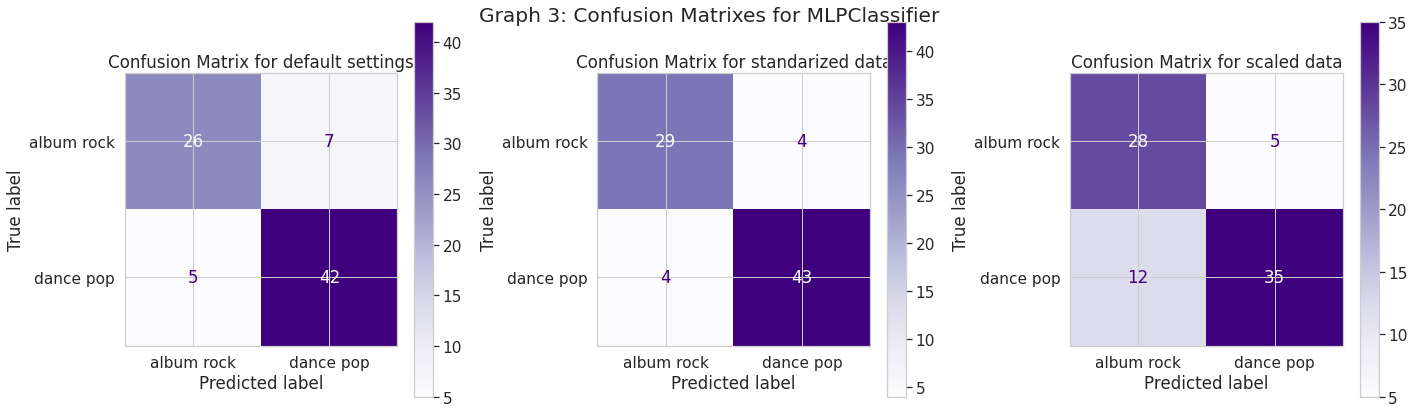

In [134]:
classifiers = [MLPC, MLPC_ST, MLPC_SC]
confusion_plot_titles = ['Confusion Matrix for default settings', 
                         'Confusion Matrix for standarized data', 
                         'Confusion Matrix for scaled data']

author_matrix = ["Album Rock, Dance Pop"]
X_tests = [X_test, X_test_ST, X_test_SC]

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20,6))
n = 0;
for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, X_tests[n], y_test, ax=ax, cmap = "Purples");
    ax.title.set_text(confusion_plot_titles[n])
    n += 1;

plt.tight_layout()  
plt.suptitle('Graph 3: Confusion Matrixes for MLPClassifier')
#plt.rc('font', size = 11)  
plt.show()

# **Unsupervised**

In [135]:
# Hopkins Statistics (the greater to 1 the greater tendecy to group)
data_without_labels = popnrock.drop(columns=["Top Genre"])

#scaling
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(data_without_labels)

def hopkins(data_without_labels):
    d =data_without_labels.shape[1]
    n = len(data_without_labels)
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(data_without_labels.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(data_without_labels,axis=0),np.amax(data_without_labels,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(data_without_labels.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
    return H
# Create dataframe of sclaled fetaures
df_scaled = pd.DataFrame(df_scaled, columns = data_without_labels.columns)

# Evaluate Hopkins Statistics
print('Hopkins statistics is: ', round(hopkins(df_scaled),2))

Hopkins statistics is:  0.76


# **K-means + osuwisko**

In [136]:
# choose 2 characteritcs to group data

selected_cols = ['Valence', 'Loudness (dB)']
cluster_data = popnrock.loc[:,selected_cols]
result_osuwisko = []
for n in range(2, 16):
    kmeans = KMeans(n_clusters = n)
    kmeans.fit(cluster_data )
    result_osuwisko.append([n, kmeans.inertia_])
result_osuwisko= pd.DataFrame(result_osuwisko, columns = ['No. of gropus', 
                                                          'inertia'])

#precentage drop to osuwisko
diff = [0]
for n in range(0, 13):
    diff.append(((result_osuwisko.iloc[n,1] - result_osuwisko.iloc[n+1, 1])/result_osuwisko.iloc[n, 1]*100))
result_osuwisko = result_osuwisko.assign(zysk_proc = diff)
result_osuwisko.set_index('No. of gropus', inplace = True)
result_osuwisko.head(15)

,inertia,zysk_proc
No. of gropus,,
2,129160.337218,0.000000
3,66189.816373,48.753760
4,42939.712759,35.126406
5,31919.887185,25.663482
6,24951.793721,21.829944
7,20474.732900,17.942842
8,18445.846607,9.909220
9,16457.834738,10.777558
10,14945.922771,9.186579


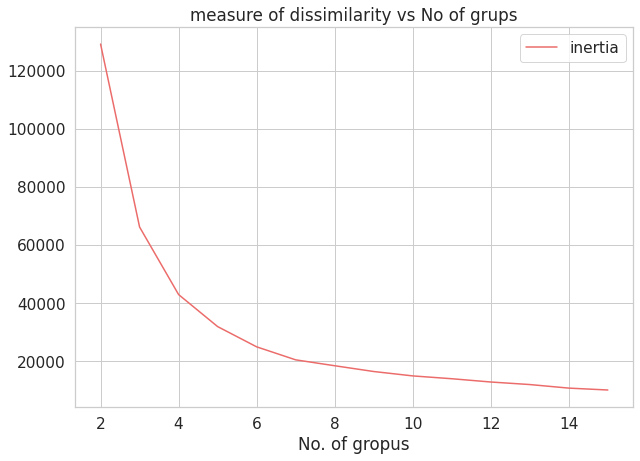

In [137]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4, style = "whitegrid")
sns.lineplot(data = result_osuwisko.drop('zysk_proc', axis = 1),
             palette = ['#eb6c6a']).set(title = "measure of dissimilarity vs No of grups")
plt.show()

Clusterization: [2 3 4 1 0 0 0 1 2 1 2 0 3 1 2 1 3 4 0 0 2 4 4 1 1 4 3 0 0 1 3 2 1 3 0 4 4
 3 3 2 3 3 0 2 3 1 3 0 3 2 1 2 1 1 3 0 0 3 1 1 0 4 4 0 2 3 3 0 3 4 2 4 2 4
 3 2 2 3 4 3 4 1 0 4 0 0 3 3 0 3 3 3 4 0 4 3 1 3 3 4 2 1 1 3 2 3 4 4 2 4 2
 0 2 1 0 0 1 0 0 0 1 3 3 2 3 0 3 2 3 0 2 2 1 3 2 3 2 2 4 1 2 4 4 4 4 1 2 3
 3 2 4 1 2 2 0 3 0 0 3 4 2 0 1 0 3 1 1 0 2 2 2 4 3 0 2 2 0 4 0 3 2 1 3 0 4
 1 3 0 2 2 0 0 3 3 4 1 1 4 1 3 1 3 3 1 4 0 2 0 2 1 3 1 4 2 0 4 4 2 4 0 3 4
 3 3 3 4 4 3 3 2 2 4 1 1 4 1 1 4 1 3 3 4 2 2 1 2 3 2 3 1 1 3 2 2 4 2 0 1 2
 0 3 1 2 2 0 3 1 4 3 0 2 2 4 4 0 1 4 1 2 3 4 2 3 1 0 4 3 4 3 2 2 4 1 1 3 0
 0 4 4 4 1 4 3 2 4 4 0 1 1 2 1 2 2 1 2 4 1 1 2 2 1 3 2 3 3 1 1 4 0 1 2 4 1
 0 0 1 3 0 3 3 0 2 3 0 2 4 4 3 1 1 0 2 1 0 0 1 2 2 1 3 2 4 4 1 2 2 4 3 4 1
 1 4 4 0 0 0 4 2 0 4 0 3 0 0 0 0 2 4 0 3 0 2 1 2 0 2 3 0 4 0 3 1 0 3 3 0 3
 3 3 3 3 2 2 1 2 2 3 2 3 0 3 3 1 3 0 4 1 2 4 1 3 3 1 1 2 2 4 0 0 3 4 4 3 1
 3 4 4 3 2 2 1 1 4 4 4 4 1 4 3 4 3 1 2 4 3 0 0 4 2 0 4 3 0 2 1 4 3 1 2 3 4
 1 1 2 2 

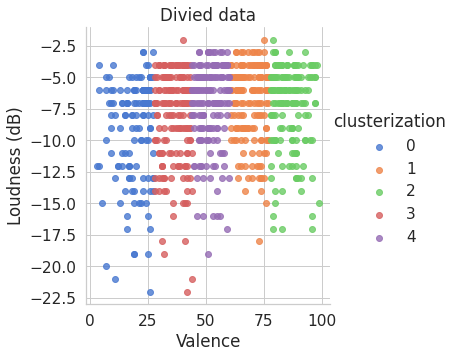

In [138]:
# 5 looks nice
clusterer = KMeans(n_clusters = 5, random_state = 0)

selected_cols = ['Valence', 'Loudness (dB)']
cluster_data = popnrock.loc[:,selected_cols]
cluster_labels = clusterer.fit_predict(cluster_data)
popnrock['clusterization'] = cluster_labels

print('Clusterization:',cluster_labels)

sns.lmplot(data=popnrock, x = 'Valence', y = 'Loudness (dB)',
           fit_reg = False, hue = 'clusterization', 
           palette = sns.color_palette("muted", 10)).set(title = 'Divied data')

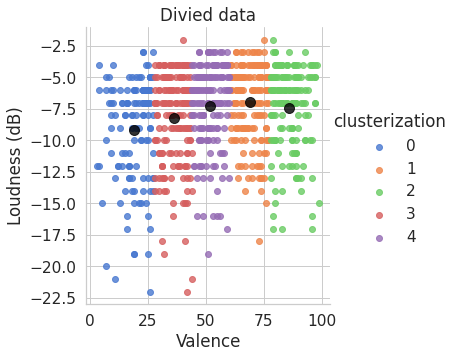

In [139]:
centers = clusterer.cluster_centers_
popnrock['clusterization'] = cluster_labels
sns.lmplot(data=popnrock, x = 'Valence', y = 'Loudness (dB)',
           fit_reg=False, hue = 'clusterization',
           palette = sns.color_palette("muted", 10)).set(title = 'Divied data')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s = 100, alpha = 0.8)
plt.show()

In [140]:
popnrock.head(10)

,Top Genre,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,clusterization
1,album rock,135.0,79.0,50.0,-11.0,17.0,81.0,207.0,17.0,7.0,39.0,2
13,album rock,117.0,93.0,38.0,-2.0,81.0,40.0,639.0,18.0,10.0,26.0,3
19,dance pop,74.0,65.0,62.0,-7.0,10.0,56.0,288.0,57.0,18.0,74.0,4
31,album rock,181.0,59.0,56.0,-9.0,20.0,68.0,306.0,32.0,3.0,57.0,1
45,dance pop,168.0,57.0,38.0,-5.0,35.0,26.0,278.0,4.0,3.0,56.0,0
54,dance pop,149.0,30.0,33.0,-7.0,11.0,14.0,243.0,78.0,3.0,67.0,0
59,album rock,124.0,59.0,47.0,-8.0,28.0,18.0,236.0,42.0,3.0,38.0,0
66,dance pop,92.0,69.0,76.0,-5.0,57.0,73.0,297.0,3.0,5.0,56.0,1
67,album rock,105.0,73.0,68.0,-8.0,14.0,94.0,281.0,11.0,2.0,59.0,2
88,album rock,115.0,67.0,72.0,-12.0,5.0,65.0,231.0,6.0,4.0,43.0,1


In [141]:
code = pd.get_dummies(popnrock.iloc[:,0].values)
print('K-means precision: ', rand_score(cluster_labels,
                                                   code.iloc[:,0]))

precisions.append(rand_score(cluster_labels,code.iloc[:,0])*100)

K-means precision:  0.5001953491031411


Completly random

# **Agglomerative Clustering**

W naszym wypadku chcemy mieć 2 kalstry - jeden na album rock, drugi na dance pop. 

In [142]:
agg_clust = AgglomerativeClustering(n_clusters = 2)
dane_do_aglomeracji = popnrock.iloc[:,1:6].values


model = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', 
                                 linkage = 'ward')
X = popnrock.iloc[:,1:6].values
model.fit(X)
labels = model.labels_
#plt.subplots(figsize = (22,7))
#plt.title("Hierarchical Clustering Dendrogram")
#dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
print(labels)
print(labels.size)

[1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0
 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0
 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 

     H_ClusterID   Top Genre  Loudness (dB)  Length (Duration)
0              1  album rock          135.0               81.0
1              0  album rock          117.0               40.0
2              0   dance pop           74.0               56.0
3              1  album rock          181.0               68.0
4              1   dance pop          168.0               26.0
..           ...         ...            ...                ...
789            0   dance pop          122.0               61.0
790            0   dance pop           93.0               14.0
791            0   dance pop          104.0               16.0
792            1   dance pop          136.0               65.0
793            0   dance pop          114.0               24.0

[794 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   H_ClusterID    

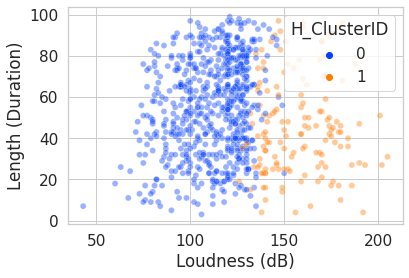

In [143]:
# again 2 characterictis, this time diffrent
wyniki = pd.DataFrame()
wyniki['H_ClusterID'] = pd.DataFrame(labels)
wyniki['Top Genre'] = popnrock.iloc[:,0].values
wyniki['Loudness (dB)'] = popnrock.iloc[:,1].values
wyniki['Length (Duration)'] = popnrock.iloc[:,6].values
print( wyniki)

sns.scatterplot(x='Loudness (dB)', y='Length (Duration)', hue='H_ClusterID', data=wyniki, palette="bright", alpha=.4)
wyniki.info()

In [144]:
#lets see group 1
wyniki_filter_0 = wyniki['H_ClusterID'].isin([1])
wyniki[wyniki_filter_0]

,H_ClusterID,Top Genre,Loudness (dB),Length (Duration)
0,1,album rock,135.0,81.0
3,1,album rock,181.0,68.0
4,1,dance pop,168.0,26.0
5,1,dance pop,149.0,14.0
11,1,dance pop,193.0,27.0
...,...,...,...,...
750,1,dance pop,158.0,78.0
756,1,dance pop,180.0,10.0
772,1,dance pop,168.0,19.0
778,1,dance pop,145.0,53.0


In [145]:
print('Agglomerative Clustering precision: ',rand_score(labels, code.iloc[:,0]))

precisions.append(rand_score(labels, code.iloc[:,0]) * 100)

Agglomerative Clustering precision:  0.5058017095428831


Again not good



# **Summary**


In [146]:
precisions
classifiers = ['LogReg', 'MLPClassifier', 'K-means','Hierarchical clusering']
final = {'Classifier': classifiers,
        'Precision': precisions}
df = pd.DataFrame(final)
df

,Classifier,Precision
0,LogReg,85.000000
1,MLPClassifier,90.000000
2,K-means,50.019535
3,Hierarchical clusering,50.580171


Unsupervised machine learnign couldn't handle the task. For this kind of data supervised machine learning is a better option

In summary album rock and dacne pop can be differentiated.